In [129]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
import numpy as np
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.applications.resnet50 import decode_predictions, preprocess_input
from keras.models import load_model
import PIL.Image as Image
import os
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import glob
import numpy as np
import pandas as pd
import os
import shutil 
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from sklearn.preprocessing import LabelEncoder 
%matplotlib inline
model = load_model('D:\deepfake_detection\datasets\\resnet\\resnet-acc-49.h5')

In [130]:
IMG_WIDTH=300
IMG_HEIGHT=300
IMG_DIM = (IMG_WIDTH, IMG_HEIGHT)

- Take equal no of real (train) and fake (test)
- Create dataframe

In [131]:
labels = pd.read_csv("D:\deepfake_detection\datasets\\out.csv", index_col=0)
all_frames = glob.glob('D:\deepfake_detection\datasets\\frames/*')
test_frames = glob.glob('D:\deepfake_detection\datasets\\test_imgs/*')
real_frames = []
fake_frames = []
for frame in all_frames:
    file_name = os.path.basename(frame)
    label = labels.loc[file_name][0]
    if label == 'REAL':
        real_frames.append((file_name, label))
for frame in test_frames[:len(real_frames)]:
    file_name = os.path.basename(frame)
    fake_frames.append((file_name, 'FAKE'))
combine_real_fake = real_frames + fake_frames
df = pd.DataFrame(combine_real_fake, columns=['file_name', 'label'])
df.set_index('file_name', inplace=True)
labelencoder = LabelEncoder()
df['label'] = labelencoder.fit_transform(df['label'])
df

,label
file_name,
abarnvbtwb_1.jpg,1
abarnvbtwb_10.jpg,1
abarnvbtwb_11.jpg,1
abarnvbtwb_12.jpg,1
abarnvbtwb_13.jpg,1
...,...
srfefmyjvt_10.jpg,0
srfefmyjvt_11.jpg,0
srfefmyjvt_12.jpg,0


In [132]:
test_imgs = [img_to_array(load_img('D:\deepfake_detection\datasets\\compress_test_train_img\\'+img, target_size=IMG_DIM)) for img in df.index]
test_imgs = np.array(test_imgs)
img_seq = df.index
img_seq[:5]

Index(['abarnvbtwb_1.jpg', 'abarnvbtwb_10.jpg', 'abarnvbtwb_11.jpg',
       'abarnvbtwb_12.jpg', 'abarnvbtwb_13.jpg'],
      dtype='object', name='file_name')

In [145]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow(test_imgs, df['label'], batch_size=30)

In [150]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_7 (Functional)    (None, 204800)            23587712  
_________________________________________________________________
dense_3 (Dense)              (None, 512)               104858112 
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
Total params: 128,708,480
Trainable params: 105,120,768
Non-trainable params: 23,587,712
_________________________________________________________________


In [152]:
feature_network= Model(model.input, model.get_layer('dense_4').output)
feature_network.summary()


Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_7_input (InputLay [(None, 300, 300, 3)]     0         
_________________________________________________________________
functional_7 (Functional)    (None, 204800)            23587712  
_________________________________________________________________
dense_3 (Dense)              (None, 512)               104858112 
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
Total params: 128,708,480
Trainable params: 105,120,768
Non-trainable params: 23,587,712
_________________________________________________________________


In [153]:
feature = feature_network.predict(test_generator)

In [154]:
file_label_df = df.reset_index()
features_df = pd.DataFrame(feature)
df_main = pd.concat([file_label_df, features_df], axis=1)
df_main.drop(0, inplace=True)
feature_file_name = 'D:\\deepfake_detection\\datasets\\resnet\\resnet.csv' # save file
df_main.to_csv(feature_file_name, index=False)
df_main.head(2)

,file_name,label,0,1,2,3,4,5,6,7,...,502,503,504,505,506,507,508,509,510,511
1,abarnvbtwb_10.jpg,1,0.0,0.151708,0.0,0.0,0.0,0.397491,0.0,0.160036,...,0.147833,0.238630,0.0,0.098886,0.106337,0.171262,0.0,0.006621,0.090725,0.0
2,abarnvbtwb_11.jpg,1,0.0,0.128611,0.0,0.0,0.0,0.416770,0.0,0.149314,...,0.164382,0.237228,0.0,0.099774,0.112055,0.193069,0.0,0.013343,0.117672,0.0


## TSBTCn-ary code

In [17]:
from PIL import Image
import numpy as np
from numpy.core.fromnumeric import sort
from xlwt import Workbook
import os

wb = Workbook()

sheet1 = wb.add_sheet('Sheet 1', cell_overwrite_ok=True)
input_tsbtc = 2

for i in range(1, input_tsbtc+1):
    sheet1.write(0, i, 'R' + str(i))
    sheet1.write(0, input_tsbtc+i, 'G'+str(i))
    sheet1.write(0, 2*input_tsbtc+i, 'B'+str(i))
sheet1.write(0, 3*input_tsbtc+1, 'Images')

result = []

def write_into_word(curr_dir):
    img_format = ['JPEG', 'TIFF', 'BMP']
    count = 1
    for imagePath in os.listdir(curr_dir):
           
        # open folder
        sheet1.write(count, 1, imagePath)

        # red color
        try:
            img = Image.open(imagePath)
            format = img.format
            if format not in img_format:
                continue
            red, green, blue = img.split()
        except:
            continue
        redarr = np.asarray(red)
        red_array_1d = redarr.flatten()
        sorted_arr = np.sort(red_array_1d)
        ll = len(sorted_arr)
        red_array = []
        for i in range(input_tsbtc):
            if i != input_tsbtc - 1:
                red_array.append(np.average(
                    sorted_arr[i*ll//input_tsbtc: (i+1)*ll//input_tsbtc]))
            else:
                red_array.append(np.average(sorted_arr[i*ll//input_tsbtc:]))
        for i in range(1, input_tsbtc+1):
            sheet1.write(count, i, red_array[i-1])
        # print(imagePath)

        # green color
        greenarr = np.asarray(green)
        green_array_1d = greenarr.flatten()
        sorted_arr = np.sort(green_array_1d)
        ll = len(sorted_arr)
        green_array = []
        for i in range(input_tsbtc):
            if i != input_tsbtc - 1:
                green_array.append(np.average(
                    sorted_arr[i*ll//input_tsbtc: (i+1)*ll//input_tsbtc]))
            else:
                green_array.append(np.average(sorted_arr[i*ll//input_tsbtc:]))
        for i in range(1, input_tsbtc+1):
            sheet1.write(count, input_tsbtc+i, green_array[i-1])
        # print(imagePath)

        # blue color
        bluearr = np.asarray(blue)
        blue_array_1d = bluearr.flatten()
        sorted_arr = np.sort(blue_array_1d)
        ll = len(sorted_arr)
        blue_array = []
        for i in range(input_tsbtc):
            if i != input_tsbtc - 1:
                blue_array.append(np.average(
                    sorted_arr[i*ll//input_tsbtc: (i+1)*ll//input_tsbtc]))
            else:
                blue_array.append(np.average(sorted_arr[i*ll//input_tsbtc:]))
        for i in range(1, input_tsbtc+1):
            sheet1.write(count, 2*input_tsbtc+i, blue_array[i-1])

        sheet1.write(count, 3*input_tsbtc+1, str(imagePath.split('.')[0]))
        count += 1
    print('Completed.....................')
    os.chdir(curr_dir)

write_into_word("D:\deepfake_detection\datasets\\compress_test_train_img")


Completed.....................


In [18]:
file_path = 'D:\deepfake_detection\datasets\densenet-121\\tsbtc2.xls'
wb.save(file_path)

- Convert to excel
- drop 1st col
- combine

In [19]:
tsbtc_df = pd.read_excel(file_path)
tsbtc_df.drop(['Unnamed: 0'], axis=1, inplace=True)
tsbtc_df['Images'] = tsbtc_df['Images'].apply(lambda x: x+'.jpg')
tsbtc_df.rename(columns = {'Images':'file_name'}, inplace = True)
df_reset = df.reset_index()
df_tsbtc = pd.merge(tsbtc_df, df_reset, on='file_name')
col = [x for x in df_tsbtc.columns if x not in ['file_name', 'label']]
df_tsbtc[col] = df_tsbtc[col].divide(100, axis="index")
df_tsbtc.to_csv('D:\deepfake_detection\datasets\\densenet-121\\labeled_tsbtc2.csv', index=False)
df_tsbtc.head(2)

,R1,R2,G1,G2,B1,B2,file_name,label
0,0.952914,1.271400,0.612784,1.651901,0.53883,1.359354,abarnvbtwb_1.jpg,1
1,0.948950,1.323626,0.639303,1.611259,0.58728,1.373184,abarnvbtwb_10.jpg,1


In [20]:
df = pd.read_csv('D:\deepfake_detection\datasets\densenet-121\densenet121_5050_acc72.csv')
df.head(2)

,file_name,label,0,1,2,3,4,5,6,7,...,502,503,504,505,506,507,508,509,510,511
0,abarnvbtwb_10.jpg,1,0.177392,0.0,1.181955,0.0,1.521970,0.0,1.247694,0.00000,...,0.408987,0.045139,0.231202,0.0,0.000000,0.545628,0.0,0.455385,0.000000,0.0
1,abarnvbtwb_11.jpg,1,0.000000,0.0,1.233578,0.0,1.564621,0.0,0.406971,0.17623,...,0.883375,0.000000,0.000000,0.0,0.581974,0.000000,0.0,0.728327,0.003772,0.0


In [21]:
df_tsbtc.drop(['label'], inplace=True, axis=1)
df_final = pd.merge(df, df_tsbtc, on='file_name')
df_final.head(2)

,file_name,label,0,1,2,3,4,5,6,7,...,508,509,510,511,R1,R2,G1,G2,B1,B2
0,abarnvbtwb_10.jpg,1,0.177392,0.0,1.181955,0.0,1.521970,0.0,1.247694,0.00000,...,0.0,0.455385,0.000000,0.0,0.948950,1.323626,0.639303,1.611259,0.587280,1.373184
1,abarnvbtwb_11.jpg,1,0.000000,0.0,1.233578,0.0,1.564621,0.0,0.406971,0.17623,...,0.0,0.728327,0.003772,0.0,0.955135,1.332521,0.644398,1.616432,0.592714,1.388589


In [22]:
df_final.to_csv('D:\deepfake_detection\datasets\densenet-121\densenet121_tsbtc2_5050_acc72_tsbtc.csv', index=False)

# Machine Learning

## Densenet-121

In [155]:
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from numpy import mean
from numpy import std
# df_final = pd.read_csv('D:\deepfake_detection\datasets\densenet-121\densenet121_tsbtc2_5050_acc72_tsbtc.csv') # Feature + tsbtc
df_final = pd.read_csv("D:\\deepfake_detection\\datasets\\resnet\\resnet.csv") # Only Features
# df_final = pd.read_csv('D:\deepfake_detection\datasets\densenet-121\labeled_tsbtc2.csv') # Only TSBTc
df_final.head(2)

,file_name,label,0,1,2,3,4,5,6,7,...,502,503,504,505,506,507,508,509,510,511
0,abarnvbtwb_10.jpg,1,0.0,0.151708,0.0,0.0,0.0,0.397491,0.0,0.160036,...,0.147833,0.238630,0.0,0.098886,0.106337,0.171262,0.0,0.006621,0.090725,0.0
1,abarnvbtwb_11.jpg,1,0.0,0.128611,0.0,0.0,0.0,0.416770,0.0,0.149314,...,0.164382,0.237228,0.0,0.099774,0.112055,0.193069,0.0,0.013343,0.117672,0.0


In [156]:
try:
    df_final.drop(['file_name'], axis=1, inplace=True)
except:
    pass

X = df_final.drop(['label'], axis=1)
y = df_final['label']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)


In [157]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
382,0.0,0.162254,0.0,0.0,0.0,0.390131,0.0,0.153700,0.092920,0.145780,...,0.140444,0.230164,0.0,0.102664,0.115483,0.175089,0.0,0.017700,0.086721,0.0
529,0.0,0.135269,0.0,0.0,0.0,0.399155,0.0,0.154719,0.092923,0.146045,...,0.157683,0.234778,0.0,0.092069,0.106607,0.180501,0.0,0.011667,0.104543,0.0
1231,0.0,0.190899,0.0,0.0,0.0,0.386290,0.0,0.175716,0.070868,0.139011,...,0.114549,0.237085,0.0,0.111192,0.111018,0.153748,0.0,0.000000,0.061212,0.0
211,0.0,0.218112,0.0,0.0,0.0,0.361557,0.0,0.225307,0.089902,0.138008,...,0.099915,0.236192,0.0,0.076186,0.114167,0.147851,0.0,0.000000,0.046596,0.0
1393,0.0,0.215932,0.0,0.0,0.0,0.340077,0.0,0.182761,0.067435,0.132273,...,0.088026,0.221582,0.0,0.099283,0.108001,0.129006,0.0,0.000382,0.028344,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,0.0,0.131462,0.0,0.0,0.0,0.396491,0.0,0.150827,0.091896,0.144235,...,0.156988,0.231883,0.0,0.092267,0.105629,0.179866,0.0,0.011686,0.105428,0.0
1368,0.0,0.165814,0.0,0.0,0.0,0.398959,0.0,0.176834,0.102595,0.143875,...,0.138268,0.233579,0.0,0.093212,0.120070,0.183654,0.0,0.012693,0.094658,0.0
2122,0.0,0.117474,0.0,0.0,0.0,0.412395,0.0,0.145125,0.090492,0.145409,...,0.167430,0.236545,0.0,0.096807,0.104390,0.187567,0.0,0.008700,0.118560,0.0
141,0.0,0.147391,0.0,0.0,0.0,0.395860,0.0,0.143798,0.088581,0.145734,...,0.148746,0.231180,0.0,0.105191,0.111045,0.176785,0.0,0.015633,0.094651,0.0


In [158]:
y_test.value_counts()

1    341
0    317
Name: label, dtype: int64

### SVM

In [159]:
from sklearn.metrics import classification_report
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) # TP FP FN TN
print(classification_report(y_test, y_pred, output_dict=True))

Accuracy: 0.4817629179331307
[[317   0]
 [341   0]]
{'0': {'precision': 0.4817629179331307, 'recall': 1.0, 'f1-score': 0.6502564102564102, 'support': 317}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 341}, 'accuracy': 0.4817629179331307, 'macro avg': {'precision': 0.24088145896656535, 'recall': 0.5, 'f1-score': 0.3251282051282051, 'support': 658}, 'weighted avg': {'precision': 0.23209550909544444, 'recall': 0.4817629179331307, 'f1-score': 0.31326942560985116, 'support': 658}}


c:\Users\iamsu\miniconda3\envs\data_sci\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\iamsu\miniconda3\envs\data_sci\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\iamsu\miniconda3\envs\data_sci\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree Classifier

In [160]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) # TP FP FN TN
print(classification_report(y_test, y_pred, output_dict=True))


Accuracy: 0.513677811550152
[[154 163]
 [157 184]]
{'0': {'precision': 0.49517684887459806, 'recall': 0.48580441640378547, 'f1-score': 0.49044585987261147, 'support': 317}, '1': {'precision': 0.5302593659942363, 'recall': 0.5395894428152492, 'f1-score': 0.5348837209302325, 'support': 341}, 'accuracy': 0.513677811550152, 'macro avg': {'precision': 0.5127181074344171, 'recall': 0.5126969296095174, 'f1-score': 0.512664790401422, 'support': 658}, 'weighted avg': {'precision': 0.5133579101782404, 'recall': 0.513677811550152, 'f1-score': 0.513475207320406, 'support': 658}}


### Random Forest

In [161]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) # TP FP FN TN
print(classification_report(y_test, y_pred, output_dict=True))

Accuracy: 0.49848024316109424
[[219  98]
 [232 109]]
{'0': {'precision': 0.48558758314855877, 'recall': 0.6908517350157729, 'f1-score': 0.5703125000000001, 'support': 317}, '1': {'precision': 0.5265700483091788, 'recall': 0.3196480938416422, 'f1-score': 0.39781021897810215, 'support': 341}, 'accuracy': 0.49848024316109424, 'macro avg': {'precision': 0.5060788157288687, 'recall': 0.5052499144287076, 'f1-score': 0.48406135948905116, 'support': 658}, 'weighted avg': {'precision': 0.5068262163093056, 'recall': 0.49848024316109424, 'f1-score': 0.4809154212333327, 'support': 658}}


### Naive Bayes

In [162]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) # TP FP FN TN
print(classification_report(y_test, y_pred, output_dict=True))

Accuracy: 0.5273556231003039
[[ 43 274]
 [ 37 304]]
{'0': {'precision': 0.5375, 'recall': 0.13564668769716087, 'f1-score': 0.21662468513853902, 'support': 317}, '1': {'precision': 0.5259515570934256, 'recall': 0.8914956011730205, 'f1-score': 0.6615886833514689, 'support': 341}, 'accuracy': 0.5273556231003039, 'macro avg': {'precision': 0.5317257785467128, 'recall': 0.5135711444350907, 'f1-score': 0.439106684245004, 'support': 658}, 'weighted avg': {'precision': 0.531515168645681, 'recall': 0.5273556231003039, 'f1-score': 0.4472215291972154, 'support': 658}}


### Logistic Regression

In [163]:
from sklearn.linear_model import LogisticRegression  
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) # TP FP FN TN
print(classification_report(y_test, y_pred, output_dict=True))

Accuracy: 0.48328267477203646
[[225  92]
 [248  93]]
{'0': {'precision': 0.47568710359408034, 'recall': 0.7097791798107256, 'f1-score': 0.5696202531645569, 'support': 317}, '1': {'precision': 0.5027027027027027, 'recall': 0.2727272727272727, 'f1-score': 0.3536121673003802, 'support': 341}, 'accuracy': 0.48328267477203646, 'macro avg': {'precision': 0.48919490314839154, 'recall': 0.49125322626899914, 'f1-score': 0.46161621023246857, 'support': 658}, 'weighted avg': {'precision': 0.4896875888464211, 'recall': 0.48328267477203646, 'f1-score': 0.4576768530434562, 'support': 658}}


### KNN

In [164]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) # TP FP FN TN
print(classification_report(y_test, y_pred, output_dict=True))

Accuracy: 0.5182370820668692
[[161 156]
 [161 180]]
{'0': {'precision': 0.5, 'recall': 0.5078864353312302, 'f1-score': 0.5039123630672926, 'support': 317}, '1': {'precision': 0.5357142857142857, 'recall': 0.5278592375366569, 'f1-score': 0.5317577548005908, 'support': 341}, 'accuracy': 0.5182370820668692, 'macro avg': {'precision': 0.5178571428571428, 'recall': 0.5178728364339436, 'f1-score': 0.5178350589339418, 'support': 658}, 'weighted avg': {'precision': 0.5185084672166739, 'recall': 0.5182370820668692, 'f1-score': 0.5183428776281661, 'support': 658}}


### Ada Boost Classifier

In [165]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) # TP FP FN TN
print(classification_report(y_test, y_pred, output_dict=True))

Accuracy: 0.5273556231003039
[[165 152]
 [159 182]]
{'0': {'precision': 0.5092592592592593, 'recall': 0.5205047318611987, 'f1-score': 0.5148205928237128, 'support': 317}, '1': {'precision': 0.5449101796407185, 'recall': 0.533724340175953, 'f1-score': 0.5392592592592593, 'support': 341}, 'accuracy': 0.5273556231003039, 'macro avg': {'precision': 0.5270847194499889, 'recall': 0.5271145360185758, 'f1-score': 0.5270399260414861, 'support': 658}, 'weighted avg': {'precision': 0.527734888210745, 'recall': 0.5273556231003039, 'f1-score': 0.5274856160068759, 'support': 658}}


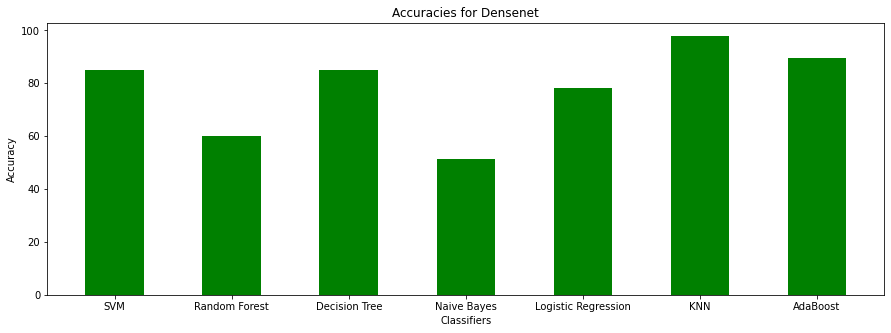

In [166]:

import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'SVM':85.106, 'Random Forest':60.182, 'Decision Tree':84.954,
        'Naive Bayes':51.367, 'Logistic Regression': 78.115, 'KNN':97.872, 'AdaBoost':89.665}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='green', width = 0.5)
 
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Accuracies for Densenet")
plt.show()

## Inception